<a href="https://colab.research.google.com/github/AbhishekRaje2004/ECG-Analysis-and-Arrhythmia-DetectionECG-Analysis-and-Arrhythmia-Detection/blob/main/ECG-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d analiviafr/ecg-images

 98% 191M/195M [00:02<00:00, 105MB/s] 
100% 195M/195M [00:02<00:00, 92.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ecg-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ecg_img/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=64,
    image_size=(64,64)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ecg_img/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=64,
    image_size=(64,64)
)

Found 37178 files belonging to 5 classes.
Found 17435 files belonging to 5 classes.


In [ ]:
# create CNN model
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(64, 64, 3)))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 29, 29, 64)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
581/581 [==============================] - 45s 76ms/step - loss: 0.0176 - accuracy: 0.9951 - val_loss: 4.8671 - val_accuracy: 0.1689
Epoch 2/5
581/581 [==============================] - 36s 62ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 1.8719 - val_accuracy: 0.6654
Epoch 3/5
581/581 [==============================] - 38s 66ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 1.2792 - val_accuracy: 0.7459
Epoch 4/5
581/581 [==============================] - 36s 62ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 1.6029 - val_accuracy: 0.5781
Epoch 5/5
581/581 [==============================] - 36s 62ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 3.0197 - val_accuracy: 0.2767


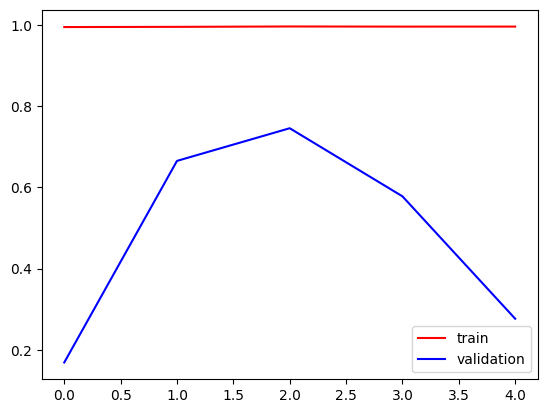

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

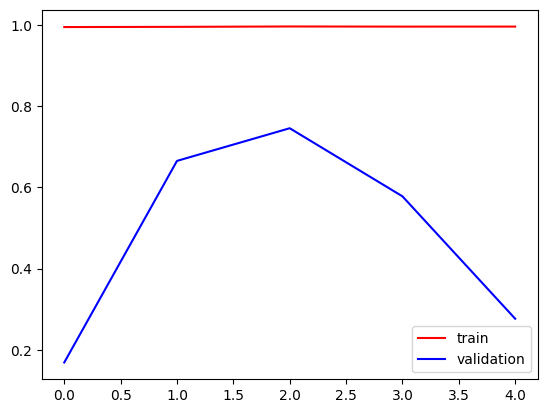

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

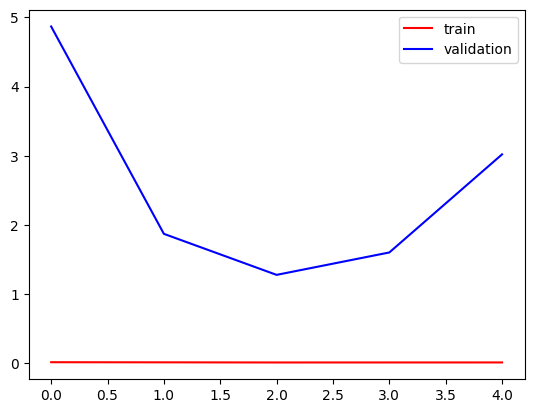

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

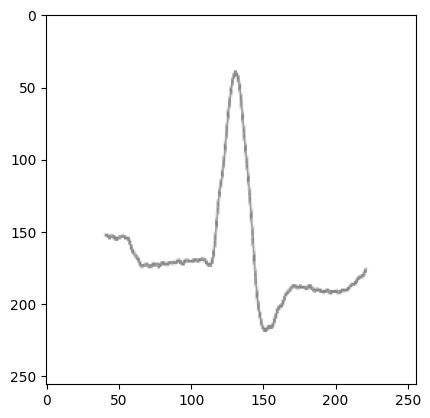

In [ ]:
import cv2
test_img = cv2.imread('/content/ecg_img/train/N/L/Lfig_100.png')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape((1,64,64,3))



```
the array represents the probability of the test image to belong to the ith class .
The array is the  return value of the softmax function.
The classes for arrthemia detection are
0:F
1:N
2:Q
3:S
4:V


```



In [ ]:
import numpy as np
model.predict(test_input)


1/1 [==============================] - 0s 40ms/step


array([[3.5637483e-02, 7.0437580e-01, 2.4389952e-01, 1.5841467e-02,
        2.4570723e-04]], dtype=float32)